<a href="https://colab.research.google.com/github/stellagerantoni/learning-time-series-counterfactuals/blob/main/traffic_lights_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 00000_00000.ppm to 00000_00000.ppm
Saving 00000_00001.ppm to 00000_00001.ppm
Saving 00000_00002.ppm to 00000_00002.ppm
Saving 00000_00003.ppm to 00000_00003.ppm
Saving 00000_00004.ppm to 00000_00004.ppm
Saving 00000_00005.ppm to 00000_00005.ppm
Saving 00000_00006.ppm to 00000_00006.ppm
Saving 00000_00007.ppm to 00000_00007.ppm
Saving 00000_00008.ppm to 00000_00008.ppm
Saving 00000_00009.ppm to 00000_00009.ppm
Saving 00000_00010.ppm to 00000_00010.ppm
Saving 00000_00011.ppm to 00000_00011.ppm
Saving 00000_00012.ppm to 00000_00012.ppm
Saving 00000_00013.ppm to 00000_00013.ppm
Saving 00000_00014.ppm to 00000_00014.ppm
Saving 00000_00015.ppm to 00000_00015.ppm
Saving 00000_00016.ppm to 00000_00016.ppm
Saving 00000_00017.ppm to 00000_00017.ppm
Saving 00000_00018.ppm to 00000_00018.ppm
Saving 00000_00019.ppm to 00000_00019.ppm
Saving 00000_00020.ppm to 00000_00020.ppm
Saving 00000_00021.ppm to 00000_00021.ppm
Saving 00000_00022.ppm to 00000_00022.ppm
Saving 00000_00023.ppm to 00000_00

In [30]:
def read_ppm(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return image

In [32]:
train_image = []
train_labels = []
for filename in uploaded.keys():
    # First, write the uploaded file to disk
    with open(filename, "wb") as f:
        f.write(uploaded[filename])

    # Read the .ppm file into a NumPy array
    image = read_ppm(filename)

    # Append to list
    train_image.append(image)

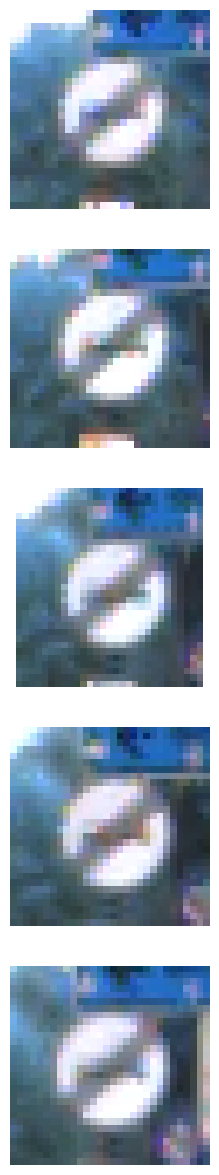

In [14]:
plt.figure(figsize=(15, 15))
for i, image in enumerate(train_image[:5]):
    #plt.subplot(nrows, ncols, index)
    plt.subplot(5, 1, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()

In [33]:
label_tensor = tf.convert_to_tensor(train_image, dtype=tf.int64)

ValueError: ignored

In [41]:
train_image[6].shape

(31, 32, 3)

In [44]:
Length = []
Width = []
for img in train_image:
  width,length=img.shape[0:2]
  Length.append(length)
  Width.append(width)
print(max(Length))
print(max(Width))

131
144


In [45]:
for img in train_image:
  print (img.shape)

(29, 29, 3)
(29, 29, 3)
(31, 29, 3)
(30, 30, 3)
(30, 30, 3)
(31, 30, 3)
(31, 32, 3)
(33, 32, 3)
(33, 32, 3)
(34, 32, 3)
(34, 33, 3)
(36, 35, 3)
(37, 37, 3)
(38, 38, 3)
(40, 40, 3)
(41, 41, 3)
(42, 41, 3)
(44, 43, 3)
(47, 45, 3)
(49, 47, 3)
(50, 49, 3)
(52, 50, 3)
(56, 53, 3)
(58, 58, 3)
(65, 65, 3)
(72, 71, 3)
(80, 82, 3)
(85, 86, 3)
(99, 99, 3)
(117, 112, 3)
(28, 26, 3)
(28, 27, 3)
(29, 27, 3)
(29, 27, 3)
(28, 28, 3)
(29, 27, 3)
(29, 28, 3)
(30, 28, 3)
(30, 28, 3)
(32, 28, 3)
(33, 30, 3)
(33, 32, 3)
(33, 32, 3)
(35, 33, 3)
(36, 33, 3)
(37, 33, 3)
(39, 35, 3)
(39, 36, 3)
(41, 39, 3)
(43, 40, 3)
(45, 43, 3)
(47, 45, 3)
(48, 45, 3)
(52, 50, 3)
(54, 52, 3)
(59, 58, 3)
(62, 59, 3)
(71, 68, 3)
(77, 74, 3)
(84, 81, 3)
(33, 30, 3)
(33, 32, 3)
(33, 31, 3)
(33, 31, 3)
(33, 32, 3)
(35, 33, 3)
(34, 33, 3)
(36, 35, 3)
(37, 34, 3)
(37, 37, 3)
(38, 38, 3)
(41, 38, 3)
(41, 39, 3)
(42, 41, 3)
(44, 41, 3)
(44, 43, 3)
(46, 45, 3)
(49, 47, 3)
(52, 50, 3)
(55, 54, 3)
(59, 57, 3)
(63, 59, 3)
(70, 63, 3)
(7

In [47]:
resized_train_images = []
for img in train_image:
    resized_img = cv2.resize(img, (100, 100))
    resized_train_images.append(resized_img)


In [49]:
numpy_array = np.array(resized_train_images)
tensor_train_images = tf.convert_to_tensor(numpy_array)

In [50]:
tensor_train_images.shape

TensorShape([180, 100, 100, 3])

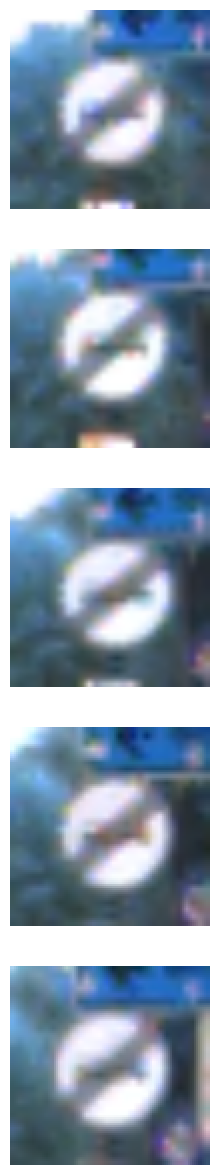

In [51]:
plt.figure(figsize=(15, 15))
for i, image in enumerate(tensor_train_images[:5]):
    #plt.subplot(nrows, ncols, index)
    plt.subplot(5, 1, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()